<a href="https://colab.research.google.com/github/devraval/GOT_S08_sentiments/blob/main/Vader_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vaderSentiment langdetect

In [ ]:
import pandas as pd 
import datetime as dt 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/GOT_Twitter_data.csv',parse_dates=[5,6],infer_datetime_format=True)

In [ ]:
df=df.sort_values(by='created_at',axis=0)

In [ ]:
df.reset_index(inplace=True)
df.index+=1
df.drop(['index','time'],1,inplace=True)

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,lang
1,80565,147960,1115767087308447744,1115767087308447744,2019-04-10 00:02:58 UTC,2019-04-10,0,76405525,davicrimmins,Davi,NaN,So I’m 3 episodes in to #GOT &amp; I open inst...,en,[],[],['https://pbs.twimg.com/media/D3wAQBWXkAADsJl....,14,0,91,['got'],[],https://twitter.com/DaviCrimmins/status/111576...,False,NaN,1,https://pbs.twimg.com/media/D3wAQBWXkAADsJl.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
2,78042,143431,1115767087308447744,1115767087308447744,2019-04-10 00:02:58 UTC,2019-04-10,0,76405525,davicrimmins,Davi,NaN,So I’m 3 episodes in to #GOT &amp; I open inst...,en,[],[],['https://pbs.twimg.com/media/D3wAQBWXkAADsJl....,14,0,91,['got'],[],https://twitter.com/DaviCrimmins/status/111576...,False,NaN,1,https://pbs.twimg.com/media/D3wAQBWXkAADsJl.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
3,78041,143430,1115767684388610048,1115767684388610048,2019-04-10 00:05:20 UTC,2019-04-10,0,1023193134258421760,fanscreening,Fan Screening,NaN,#TrendingTV daily trending scripted: 1. #Gameo...,en,[],['https://discordapp.com/invite/CDTdA5H'],['https://pbs.twimg.com/tweet_video_thumb/D3wA...,2,18,51,"['trendingtv', 'gameofthrones', 'shadowhunters...",[],https://twitter.com/FanScreening/status/111576...,False,NaN,1,https://pbs.twimg.com/tweet_video_thumb/D3wAyz...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
4,80564,147959,1115767684388610048,1115767684388610048,2019-04-10 00:05:20 UTC,2019-04-10,0,1023193134258421760,fanscreening,Fan Screening,NaN,#TrendingTV daily trending scripted: 1. #Gameo...,en,[],['https://discordapp.com/invite/CDTdA5H'],['https://pbs.twimg.com/tweet_video_thumb/D3wA...,2,18,51,"['trendingtv', 'gameofthrones', 'shadowhunters...",[],https://twitter.com/FanScreening/status/111576...,False,NaN,1,https://pbs.twimg.com/tweet_video_thumb/D3wAyz...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
5,78040,143425,1115772174638305280,1115772174638305280,2019-04-10 00:23:11 UTC,2019-04-10,0,34892463,halrudnick,Hal Rudnick,NaN,Gearing up for the final season of #GoT with t...,en,[],[],['https://pbs.twimg.com/media/D3wE3FoUEAECbMh....,15,10,282,['got'],[],https://twitter.com/halrudnick/status/11157721...,False,NaN,1,https://pbs.twimg.com/media/D3wE3FoUEAECbMh.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77955,5,15,1132797830828048385,1132797830828048385,2019-05-26 23:57:03 UTC,2019-05-26,0,970868348,aswate08,Nan,NaN,Happy Memorial day from the Queen in the North...,en,"[{'screen_name': 'sophiet', 'name': 'sophie tu...",[],[],1,1,6,"['demthronesyall', 'altending', 'got']",[],https://twitter.com/ASwate08/status/1132797830...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/11327...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
77956,4,11,1132798231161630720,1132798231161630720,2019-05-26 23:58:39 UTC,2019-05-26,0,1611334878,jennkodesign,Jennko,NaN,Check out @JennKoDesign Original Ear Bars! ht...,en,"[{'screen_name': 'jennkodesign', 'name': 'jenn...",['https://www.etsy.com/shop/JennKoDesign?ref=l...,[],0,2,0,"['jewelry', 'style', 'men', 'women', 'fashionb...",[],https://twitter.com/JennKoDesign/status/113279...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
77957,3,10,1132798368412033025,1132798368412033025,2019-05-26 23:59:12 UTC,2019-05-26,0,25957067,misskamoi,Dee Sifflet,NaN,So Varys sent the letter about Jon Snow to who...,en,[],[],[],0,0,0,"['got', 'random']",[],https://twitter.com/misskamoi/status/113279836...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,en
77958,1,1,1132798523471269888,11327985234712

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiments = df['tweet'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
df = pd.concat([df, sentiments.apply(pd.Series)],1)
df.drop_duplicates(subset = 'tweet',inplace = True)
df['created_at'] = df['created_at'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S %Z'))

In [ ]:
df1=df[['created_at','date','tweet','compound','pos','neu','neg','replies_count','likes_count','retweets_count','link']]

In [ ]:
pd.set_option('max_colwidth',-1)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,created_at,date,tweet,compound,pos,neu,neg,replies_count,likes_count,retweets_count,link
1,2019-04-10 00:02:58,2019-04-10,So I’m 3 episodes in to #GOT &amp; I open insta to feel alive again &amp; I ACTUALLY GET THIS 😮 https://t.co/snGK2HYgLz,0.3818,0.098,0.902,0.0,14,91,0,https://twitter.com/DaviCrimmins/status/1115767087308447744
3,2019-04-10 00:05:20,2019-04-10,"#TrendingTV daily trending scripted: 1. #GameofThrones 2. #ShadowhuntersChat 3. #Shadowhunters ➰ 4. #GoT 5. #ForTheThrone 6. #LegendsOfTomorrow 7. #FightForWynonna 8. #SaveShadowhunters ➰ 9. #Arrow 10. #PoseFX chat https://t.co/89CHyaN2cg like, RT &amp; follow https://t.co/Aj4dlaj0ZT",0.3612,0.068,0.932,0.0,2,51,18,https://twitter.com/FanScreening/status/1115767684388610048
5,2019-04-10 00:23:11,2019-04-10,Gearing up for the final season of #GoT with the hosts of Watching Thrones. https://t.co/gSA3ZShwbL,0.0000,0.000,1.000,0.0,15,282,10,https://twitter.com/halrudnick/status/1115772174638305280
7,2019-04-10 00:25:09,2019-04-10,Go get yourself a House Snow pin! #WeKnowNothing #GameOfThrones #GoT,0.0000,0.000,1.000,0.0,4,30,2,https://twitter.com/BaldMove/status/1115772669331292161
9,2019-04-10 00:36:24,2019-04-10,I can’t be the only person who watches Game of Thrones and sits there thinking about budgets and shooting schedules. How much would I love to get my hands on an episodes worth of paperwork? So much. #GoT #GameofThrones,0.7269,0.142,0.858,0.0,2,11,1,https://twitter.com/ShannonPratt/status/1115775502785052673
...,...,...,...,...,...,...,...,...,...,...,...
77955,2019-05-26 23:57:03,2019-05-26,Happy Memorial day from the Queen in the North @SophieT RIP @emiliaclarke #demthronesyall #altending #got https://t.co/layMPvwMIU,0.5719,0.198,0.802,0.0,1,6,1,https://twitter.com/ASwate08/status/1132797830828048385
77956,2019-05-26 23:58:39,2019-05-26,Check out @JennKoDesign Original Ear Bars! https://t.co/xUW1gWodTn … … #jewelry #style #men #women #fashionblogger #GameOfThronesFinale #gameofthrones #GOT,0.3802,0.139,0.861,0.0,0,0,2,https://twitter.com/JennKoDesign/status/1132798231161630720
77957,2019-05-26 23:59:12,2019-05-26,So Varys sent the letter about Jon Snow to who? For what? #GOT #random,0.0000,0.000,1.000,0.0,0,0,0,https://twitter.com/misskamoi/status/1132798368412033025
77958,2019-05-26 23:59:49,2019-05-26,Inspecting my sword of valyrian steel. Red Keep House: Aloha State! #got #ironthrone #hawaiigeekmeet2019 @ Magic Island (Hawaii) https://t.co/qeFvrTbnE9,0.0000,0.000,1.000,0.0,0,0,0,https://twitter.com/TapChus/status/1132798523471269888


In [ ]:
df1['SMA_4'] = df1.compound.rolling(window=1000).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


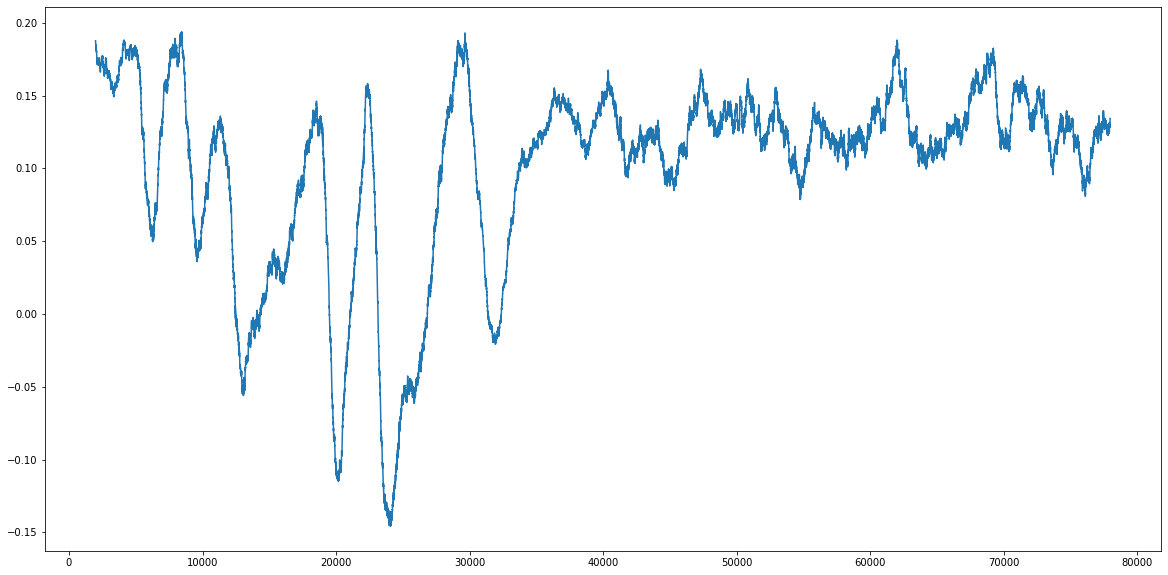

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
ax1=plt.plot('SMA_4', data=df1)


In [ ]:
df2=df1[(df1['compound']>0.3) | (df1['compound']< -0.3)]
df2['SMA_4'] = df2.compound.rolling(window=500).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rec_spans = []
import datetime
rec_spans.append([datetime.datetime(2019,4,14),datetime.datetime(2019,4,15)])
rec_spans.append([datetime.datetime(2019,4,21), datetime.datetime(2019,4,22)])
rec_spans.append([datetime.datetime(2019,4,28), datetime.datetime(2019,4,29)])
rec_spans.append([datetime.datetime(2019,5,5), datetime.datetime(2019,5,6)])
rec_spans.append([datetime.datetime(2019,5,12), datetime.datetime(2019,5,13)])
rec_spans.append([datetime.datetime(2019,5,19), datetime.datetime(2019,5,20)])

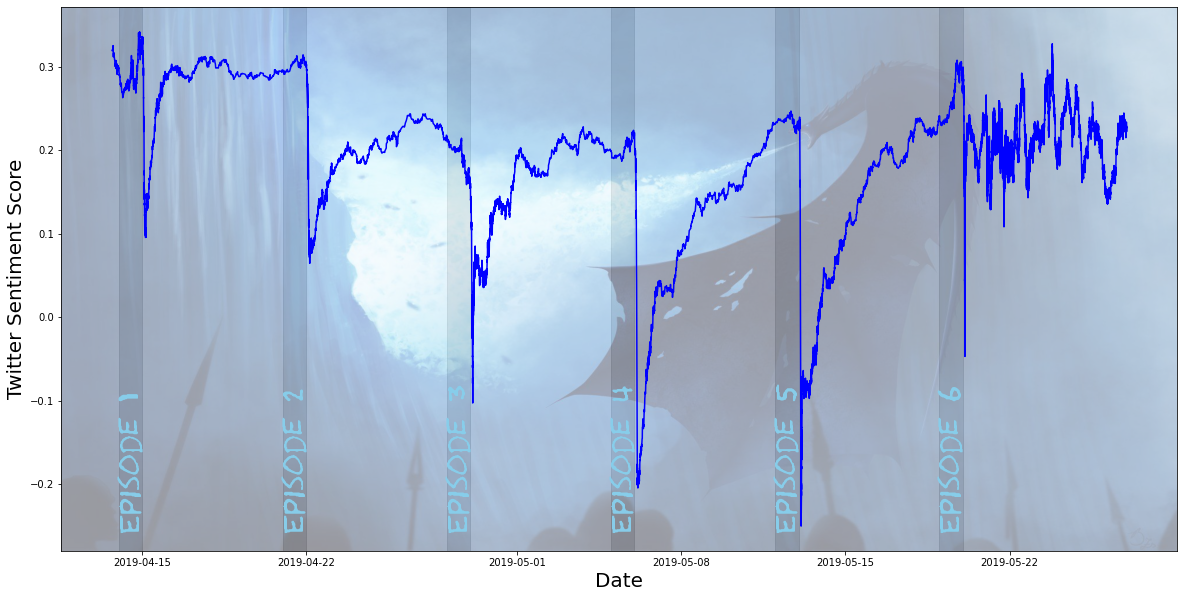

In [ ]:

img = plt.imread("/content/drive/MyDrive/Kaggle/f8d470630ac2cffa474e03994199542c.jpg")
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df2['created_at'],df2['SMA_4'], color='blue')
ax.set_xlabel(xlabel='Date', size=20)
ax.set_ylabel(ylabel='Twitter Sentiment Score' , color='blacK', size=20)
for i in range(len(rec_spans)):
    ax.axvspan(rec_spans[i][0], rec_spans[i][1], alpha=0.25, color='grey')
#ax.vlines(x=[datetime.datetime(2019,4,14),datetime.datetime(2019,4,21)],ymin=-0.3,ymax=0.4,color='b')
    ax.text(x=rec_spans[i][0],y=-0.25,s='Episode '+str(i+1),color='skyblue', alpha=3,fontfamily='fantasy',fontstyle='italic',fontweight='extra bold',fontsize=30,rotation=90)
ax.imshow(img, alpha=0.4,
          aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),
          zorder = 1)
plt.show()

In [ ]:
plt.close()